In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Load the dataset

In [38]:
funding = pd.read_csv('startup_funding.csv')

In [39]:
funding.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [40]:
funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


In [41]:
funding.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

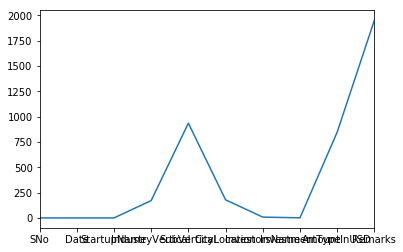

In [42]:
funding.isnull().sum().plot()

In [43]:
funding['Date'] = funding.Date.str.replace('.','/')
funding['Date'] = funding.Date.str.replace('//','/')

In [44]:
funding['Date'] = pd.to_datetime(funding.Date, format='%d/%m/%Y')

In [45]:
funding['Year'] = funding.Date.dt.year
funding['Month'] = funding.Date.dt.month
funding['Quarter'] = funding.Date.dt.quarter
funding['Week'] = funding.Date.dt.week
funding['Day'] = funding.Date.dt.day
funding['Weekday'] = funding.Date.dt.weekday_name
funding['Month_name'] = funding.Month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                                           7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [46]:
funding.head(10)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year,Month,Quarter,Week,Day,Weekday,Month_name
0,0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017,8,3,31,1,Tuesday,Aug
1,1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017,8,3,31,2,Wednesday,Aug
2,2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017,8,3,31,2,Wednesday,Aug
3,3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017,8,3,31,2,Wednesday,Aug
4,4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017,8,3,31,2,Wednesday,Aug
5,5,2017-07-01,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,"1,000,000",NaN,2017,7,3,26,1,Saturday,Jul
6,6,2017-07-03,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,"2,600,000",NaN,2017,7,3,27,3,Monday,Jul
7,7,2017-07-04,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,"20,000,000",NaN,2017,7,3,27,4,Tuesday,Jul
8,8,2017-07-05,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,"8,500,000",NaN,2017,7,3,27,5,Wednesday,Jul
9,9,2017-07-05,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,"12,000,000",NaN,2017,7,3,27,5,Wednesday,Jul


In [47]:
funding['AmountInUSD'] = funding.AmountInUSD.str.replace(',','').astype(float)

In [49]:
funding.AmountInUSD.describe()

count    1.525000e+03
mean     1.203107e+07
std      6.403118e+07
min      1.600000e+04
25%      3.700000e+05
50%      1.070000e+06
75%      6.000000e+06
max      1.400000e+09
Name: AmountInUSD, dtype: float64

In [50]:
funding.AmountInUSD.fillna(funding.AmountInUSD.median(), inplace=True)

In [51]:
funding.AmountInUSD.isnull().sum()

0

(0.0, 0.25)

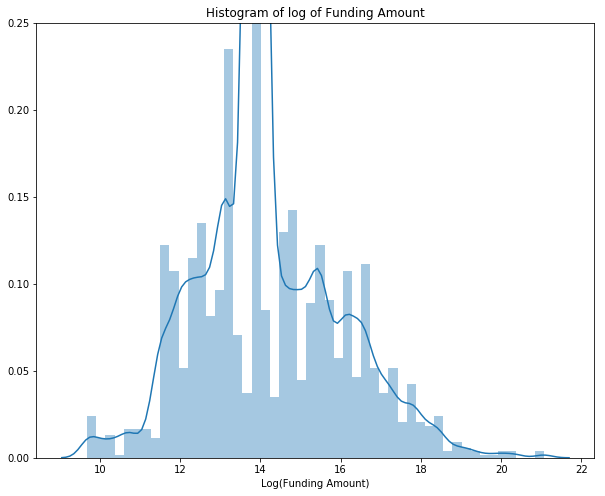

In [53]:
plt.figure(figsize=(10,8))
sns.distplot(np.log(funding.AmountInUSD))
plt.title('Histogram of log of Funding Amount')
plt.xlabel('Log(Funding Amount)')
plt.ylim(0.00,0.25)

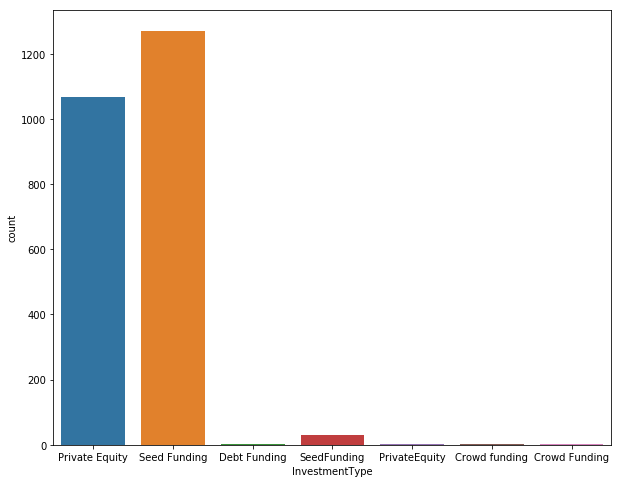

In [55]:
plt.figure(figsize=(10,8))
sns.countplot(funding.InvestmentType)

# Find distribution per investment type

In [56]:
funding.AmountInUSD.describe()

count    2.372000e+03
mean     8.117064e+06
std      5.160361e+07
min      1.600000e+04
25%      7.000000e+05
50%      1.070000e+06
75%      2.500000e+06
max      1.400000e+09
Name: AmountInUSD, dtype: float64

In [57]:
funding.AmountInUSD[funding.AmountInUSD > 2500000] = 2500000

/Users/jiangchao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
funding.AmountInUSD = funding.AmountInUSD/1000

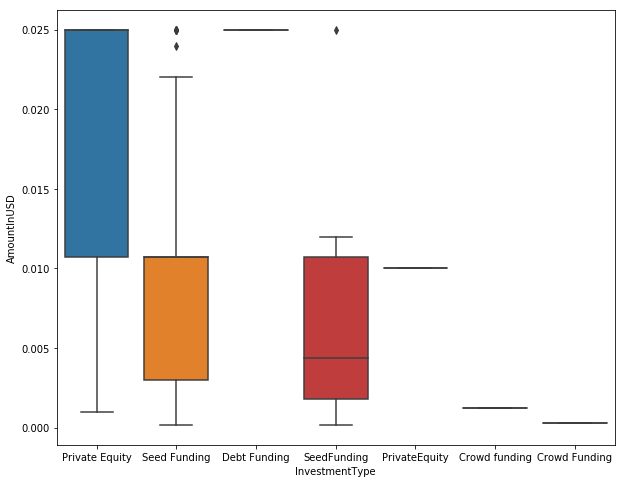

In [59]:
plt.figure(figsize=(10,8))
sns.boxplot(funding.InvestmentType, funding.AmountInUSD/100000)

# which year did most funding happen?

In [61]:
funding.groupby('Year')['SNo'].count()

Year
2015    936
2016    993
2017    443
Name: SNo, dtype: int64

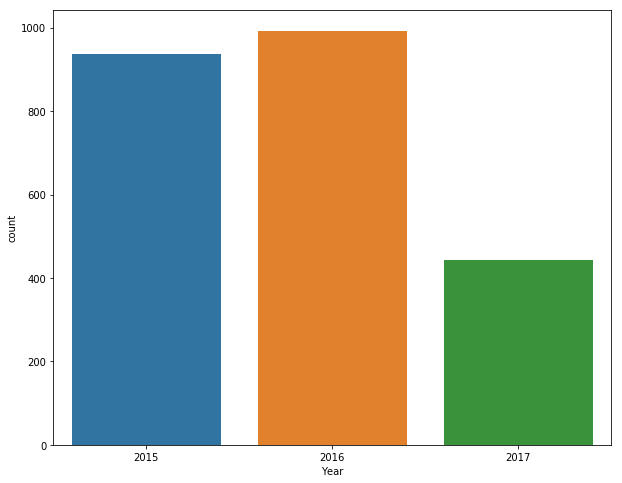

In [64]:
plt.figure(figsize=(10,8))
sns.countplot(funding.Year)

In [74]:
tmp = pd.DataFrame(funding.groupby('Year')['AmountInUSD'].mean())
tmp

,AmountInUSD
Year,
2015,1332.758940
2016,1163.120451
2017,1392.382619


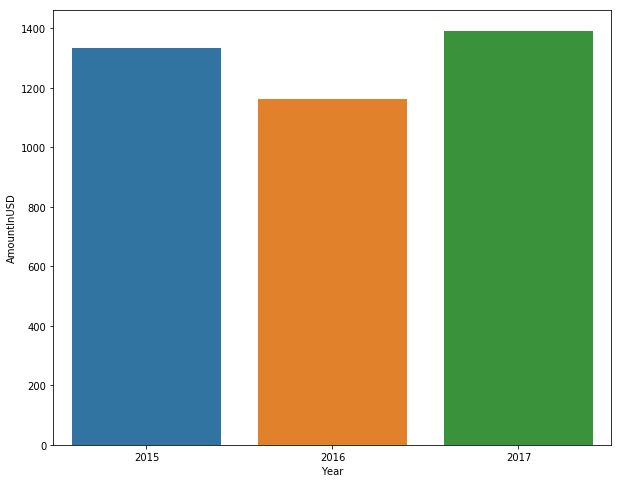

In [75]:
plt.figure(figsize=(10,8))
sns.barplot(tmp.index, tmp.AmountInUSD)

In [76]:
tmp = pd.DataFrame(funding.groupby('Month')['AmountInUSD'].mean())
tmp

,AmountInUSD
Month,
1,1226.005537
2,1196.131034
3,1243.655593
4,1398.192488
5,1255.163462
6,1309.546185
7,1459.063415
8,1210.394737
9,1225.161491


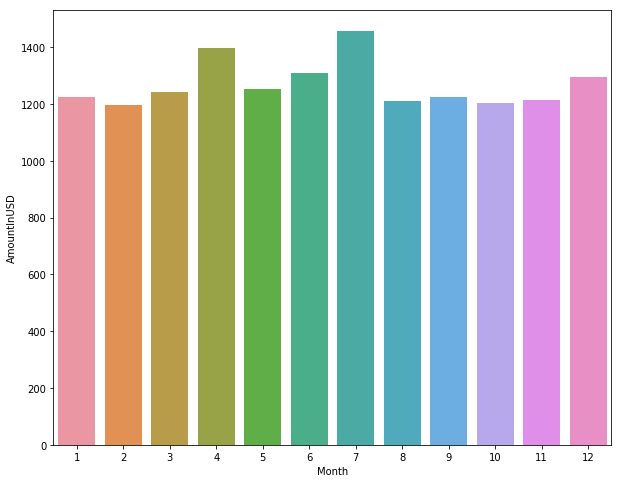

In [77]:
plt.figure(figsize=(10,8))
sns.barplot(tmp.index, tmp.AmountInUSD)

In [78]:
tmp = pd.DataFrame(funding.groupby('Weekday')['SNo'].count())
tmp

,SNo
Weekday,
Friday,405
Monday,453
Saturday,73
Sunday,11
Thursday,413
Tuesday,509
Wednesday,508


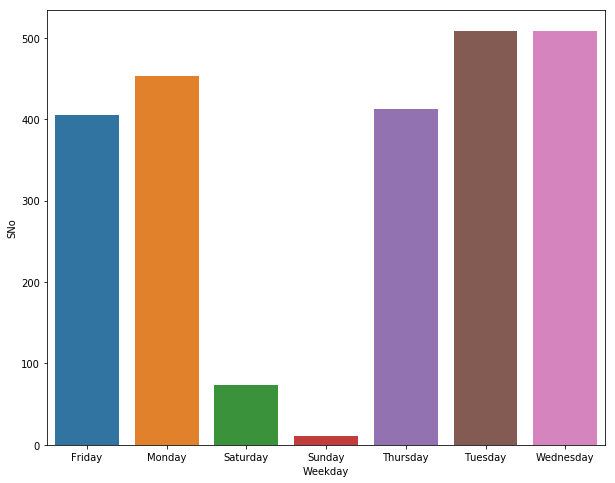

In [80]:
plt.figure(figsize=(10,8))
sns.barplot(tmp.index, tmp.SNo)

In [82]:
tmp = pd.DataFrame(funding.groupby(['Year','Weekday'], as_index=False)['SNo'].count())
tmp

,Year,Weekday,SNo
0,2015,Friday,145
1,2015,Monday,201
2,2015,Saturday,35
3,2015,Sunday,4
4,2015,Thursday,169
5,2015,Tuesday,194
6,2015,Wednesday,188
7,2016,Friday,178
8,2016,Monday,169
9,2016,Saturday,26


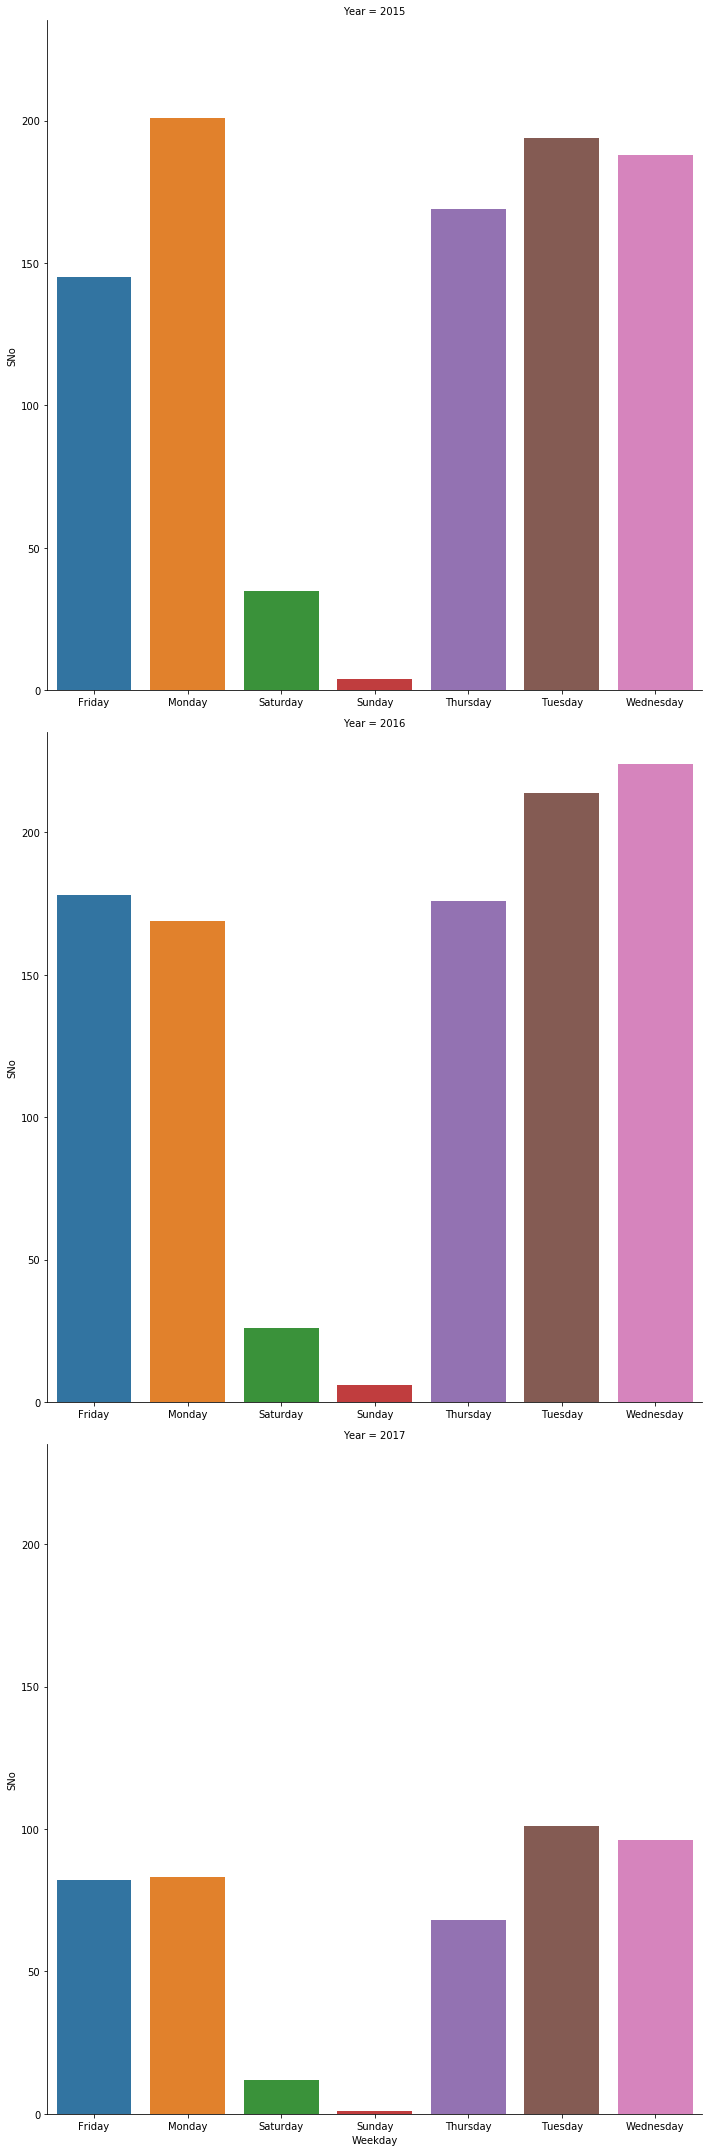

In [89]:
plt.figure(figsize=(10,8))
sns.factorplot('Weekday', 'SNo', data=tmp, kind='bar', row='Year', size=10)

In [90]:
tmp = pd.DataFrame(funding.groupby(['Year','Month'], as_index=False)['AmountInUSD'].count())
tmp

,Year,Month,AmountInUSD
0,2015,1,53
1,2015,2,55
2,2015,3,60
3,2015,4,63
4,2015,5,61
5,2015,6,86
6,2015,7,98
7,2015,8,98
8,2015,9,88
9,2015,10,93


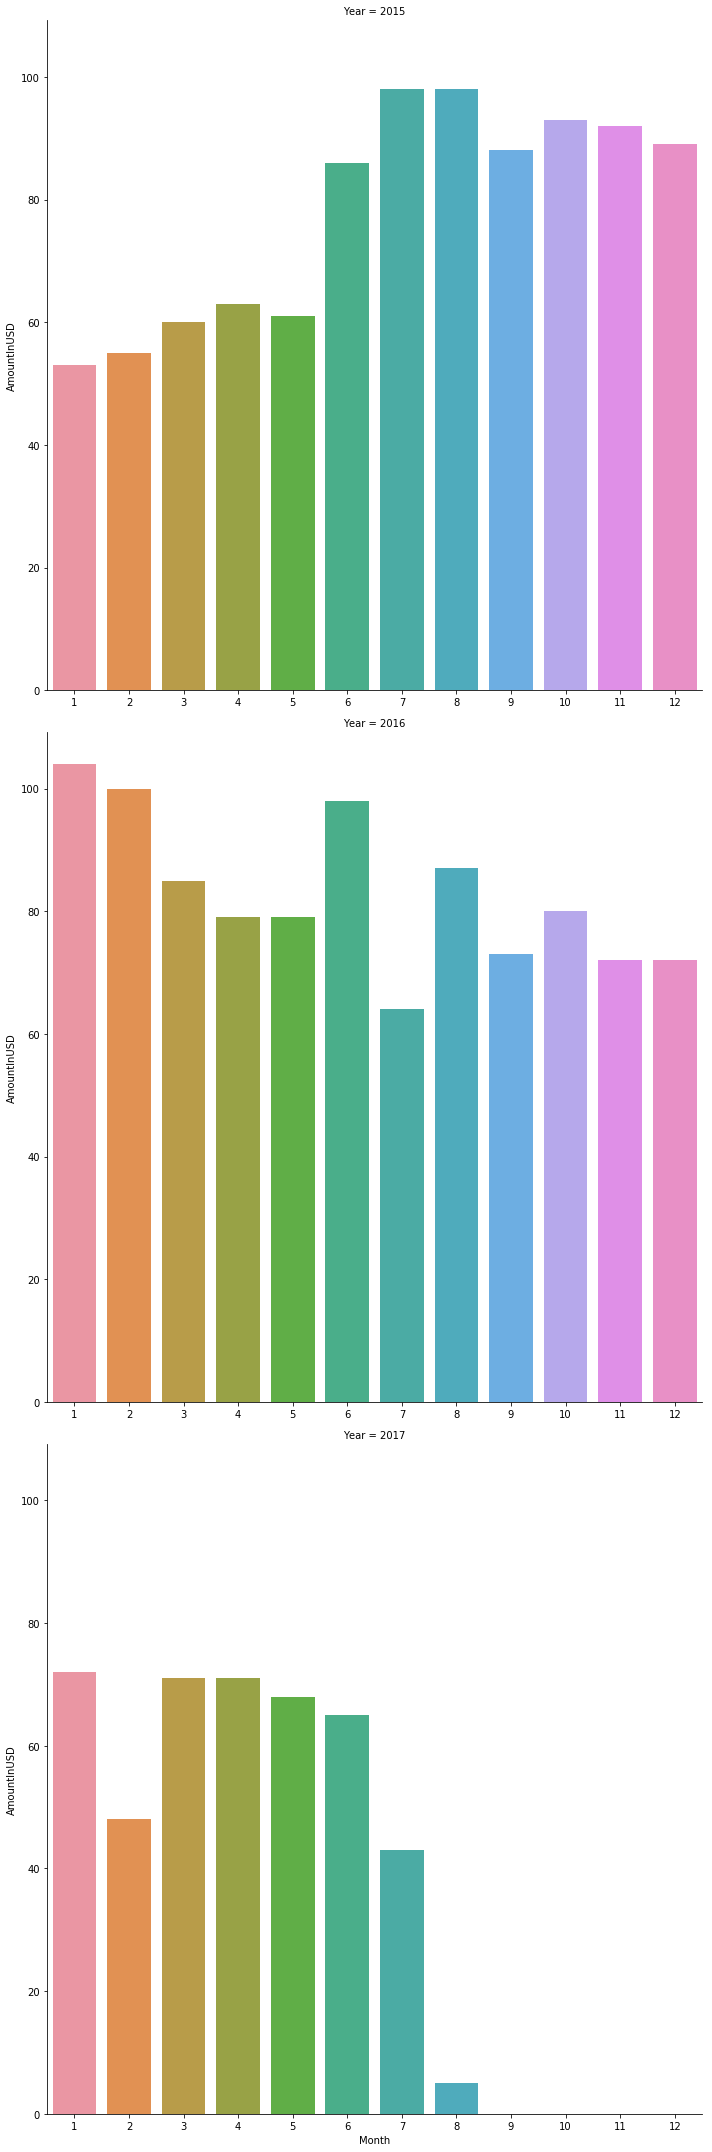

In [92]:
plt.figure(figsize=(10,8))
sns.factorplot('Month', 'AmountInUSD', data=tmp, kind='bar', row='Year', size=10)

In [93]:
tmp = pd.DataFrame(funding.groupby(['Year','InvestmentType'], as_index=False)['AmountInUSD'].mean())
tmp

,Year,InvestmentType,AmountInUSD
0,2015,Crowd Funding,30.768000
1,2015,Crowd funding,125.000000
2,2015,Private Equity,2014.573733
3,2015,PrivateEquity,1000.000000
4,2015,Seed Funding,754.614072
5,2015,SeedFunding,602.253333
6,2016,Private Equity,1782.546798
7,2016,Seed Funding,734.120491
8,2017,Debt Funding,2500.000000
9,2017,Private Equity,1956.486726


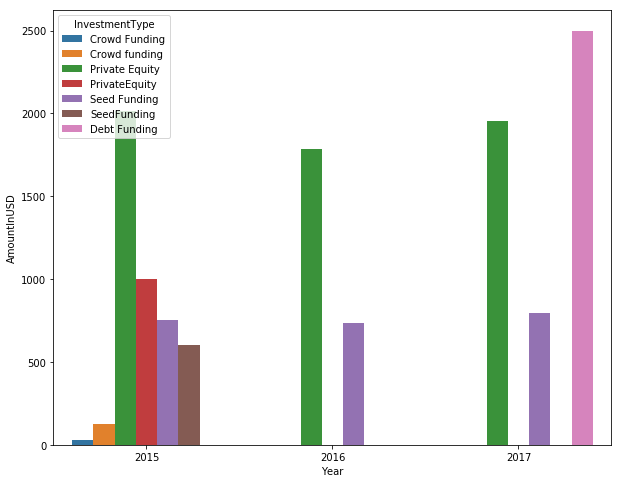

In [99]:
plt.figure(figsize=(10,8))
sns.barplot('Year','AmountInUSD',hue='InvestmentType',data=tmp)

In [108]:
tmp = pd.DataFrame(funding.groupby('IndustryVertical')['AmountInUSD'].count().nlargest(5))
tmp

,AmountInUSD
IndustryVertical,
Consumer Internet,772
Technology,313
eCommerce,171
ECommerce,53
Healthcare,30


In [109]:
funding_new = funding.loc[funding.IndustryVertical.isin(tmp.index),:]

In [110]:
funding_new

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year,Month,Quarter,Week,Day,Weekday,Month_name
0,0,2017-08-01,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300.0,NaN,2017,8,3,31,1,Tuesday,Aug
1,1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,1070.0,NaN,2017,8,3,31,2,Wednesday,Aug
2,2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,1070.0,NaN,2017,8,3,31,2,Wednesday,Aug
3,3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500.0,NaN,2017,8,3,31,2,Wednesday,Aug
4,4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850.0,NaN,2017,8,3,31,2,Wednesday,Aug
5,5,2017-07-01,Billion Loans,Consumer Internet,Peer to Peer Lending platform,Bangalore,Reliance Corporate Advisory Services Ltd,Seed Funding,1000.0,NaN,2017,7,3,26,1,Saturday,Jul
6,6,2017-07-03,Ecolibriumenergy,Technology,Energy management solutions provider,Ahmedabad,"Infuse Ventures, JLL",Private Equity,2500.0,NaN,2017,7,3,27,3,Monday,Jul
7,7,2017-07-04,Droom,eCommerce,Online marketplace for automobiles,Gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",Private Equity,2500.0,NaN,2017,7,3,27,4,Tuesday,Jul
8,8,2017-07-05,Jumbotail,eCommerce,online marketplace for food and grocery,Bangalore,"Kalaari Capital, Nexus India Capital Advisors",Private Equity,2500.0,NaN,2017,7,3,27,5,Wednesday,Jul
9,9,2017-07-05,Moglix,eCommerce,B2B marketplace for Industrial products,Noida,"International Finance Corporation, Rocketship,...",Private Equity,2500.0,NaN,2017,7,3,27,5,Wednesday,Jul


In [122]:
tmp = pd.DataFrame(funding_new.groupby(['Year','IndustryVertical'])['AmountInUSD'].mean())
tmp

AmountInUSD
Year IndustryVertical              
2015 eCommerce          2500.000000
2016 Consumer Internet  1080.899814
     ECommerce          1448.516000
     Healthcare         1173.181818
     Technology         1186.384211
     eCommerce          1303.944000
2017 Consumer Internet  1325.768240
     ECommerce          1591.600000
     Healthcare         1519.125000
     Technology         1370.735772
     eCommerce          1547.311111

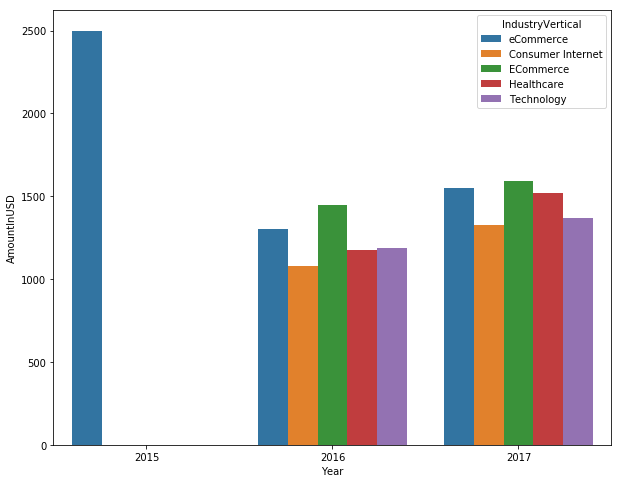

In [123]:
plt.figure(figsize=(10,8))
sns.barplot(tmp.index.get_level_values(0),'AmountInUSD',hue=tmp.index.get_level_values(1),data=tmp)

In [127]:
tmp = pd.DataFrame(funding.groupby(['StartupName'])['AmountInUSD'].sum().nlargest(5))
tmp

,AmountInUSD
StartupName,
Swiggy,17000.0
UrbanClap,12670.0
Flipkart,10000.0
Ola,10000.0
Voonik,10000.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a18da6ac8>], dtype=object)

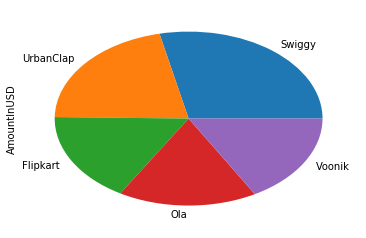

In [130]:
tmp.plot(kind='pie',subplots=True,legend=False)